# Plots

In [64]:
# assume already have the flux snapshots at desired cycle
import os
import pandas as pd
import ast

import seaborn as sns
import matplotlib.pyplot as plt

from scarcc.preparation.find_directory import find_directory 
from scarcc.data_analysis import get_fs_change
from scarcc.data_analysis import (get_row_color_legend, relabel_clustermap, generate_row_colors, assign_plot_total_E_wide,
                                    get_fs_kde_plot, plot_kde, scatter_xycol_A, scatter_xycol_B)
from scarcc.data_analysis import convert_po_col

# data_directory = find_directory('Data', os.path.abspath(''))
# flux_path = os.path.join(data_directory, 'Enormalized_carbon.xlsx')
flux_analysis = pd.read_excel(flux_path, sheet_name='flux', index_col=0)
# carbon_allocation_E_wide = pd.read_csv(os.path.join(data_directory, 'carbon_allocation_E_wide_m1.csv'), index_col=0) # equivalent to below
carbon_allocation_E_wide = pd.read_excel(flux_path, sheet_name='normalized_carbon', index_col=0).loc[:,'total_carbon_BIOMASS_Ec_iML1515_core_75p37M':]
fs_change = pd.read_excel(flux_path, sheet_name='difference_in_normalized_carbon', index_col=0)
carbon_allocation_E_wide.query('XG=="DG"').head()

,total_carbon_BIOMASS_Ec_iML1515_core_75p37M,total_carbon_EX_bulk_ac_e,total_carbon_EX_co2_e,total_carbon_EX_for_e,total_carbon_EX_gal_e,total_carbon_EX_glyclt_e,total_carbon_EX_lcts_e,total_carbon_EX_met__L_e,total_carbon_Waste,percent_BIOMASS_Ec_iML1515_core_75p37M,...,percent_EX_gal_e,percent_EX_glyclt_e,percent_EX_lcts_e,percent_EX_met__L_e,percent_Waste,XG,Drug_comb_effect_coc,Drug_comb_effect_Emono,Drug_comb_effect_Smono,BM_consortia_frac_binned
Gene_inhibition,,,,,,,,,,,,,,,,,,,,,
dadX.aroA,-0.827687,-2.523712,-1.795225,NaN,NaN,NaN,7.948830,0.016210,2.802206,-0.104127,...,NaN,NaN,1,0.002039,-0.352531,DG,Antagonistic,Antagonistic,Antagonistic,E
dadX.eno,-0.008114,-4.534300,-4.977270,NaN,NaN,NaN,33.683051,0.000158,24.163367,-0.000241,...,NaN,NaN,1,0.000005,-0.717375,DG,Additive,Antagonistic,Additive,No growth
dadX.pheA,-0.759820,-2.501663,-1.736529,NaN,NaN,NaN,7.491709,0.014881,2.493697,-0.101422,...,NaN,NaN,1,0.001986,-0.332861,DG,Antagonistic,Antagonistic,Antagonistic,E
dadX.acnB,-0.561175,-2.249162,-1.427180,NaN,NaN,NaN,6.142324,0.010991,1.904807,-0.091362,...,NaN,NaN,1,0.001789,-0.310112,DG,Additive,Antagonistic,Additive,E
aroA.dapF,-0.701962,-2.231143,-1.893485,NaN,NaN,NaN,7.046120,0.013748,2.219530,-0.099624,...,NaN,NaN,1,0.001951,-0.315000,DG,Antagonistic,Antagonistic,Antagonistic,E


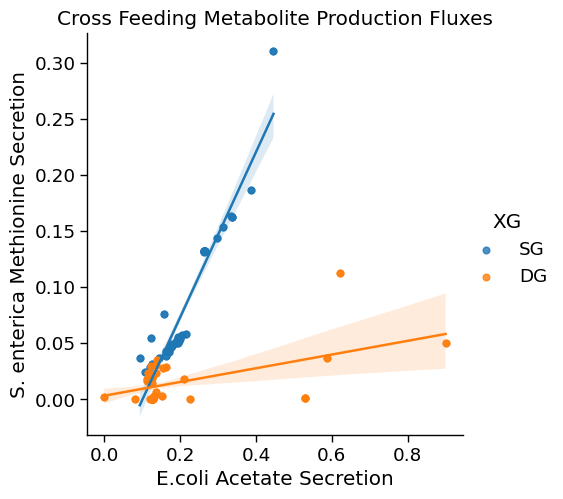

In [19]:
scatter_xycol_A(flux_analysis, x_col='EX_bulk_ac_e', y_col='BIOMASS_iRR1083_metals')

In [21]:
# gr_path = os.path.join(data_directory, 'gr_DG_m1_normalized.csv')
# gr_df = pd.read_csv(gr_path, index_col=0)


# from scarcc.data_analysis import get_fs_change
# fs_change = get_fs_change(gr_path=gr_path,carbon_allocation_E_wide=carbon_allocation_E_wide)


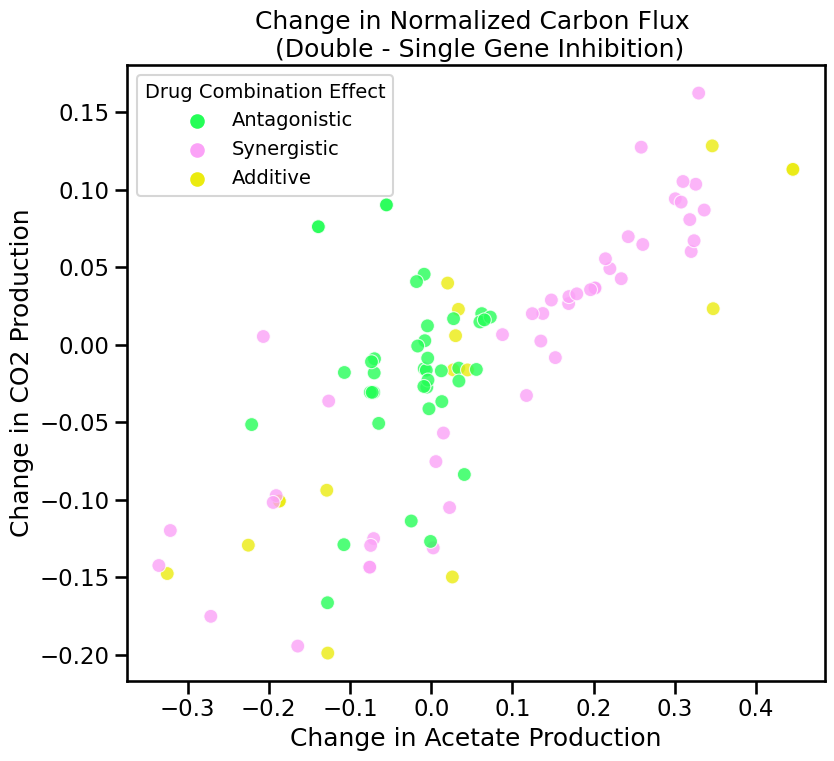

In [65]:
sns.set_context('talk', font_scale=1) 
x_col = 'EX_bulk_ac_e' # other options: 'Waste', 'BIOMASS_Ec_iML1515_core_75p37M'
y_col = 'EX_co2_e'
scatter_xycol_B(fs_change, x_col, y_col)

read fs_change from excel or derive from E_wide

In [66]:
fs_change = pd.read_excel(os.path.join(data_directory, 'Enormalized_carbon.xlsx'), sheet_name='difference_in_normalized_carbon', index_col=0) # same as below
# gr_path = os.path.join(data_directory, 'gr_DG_checkerboard_normalized.csv')
# fs_change = get_fs_change(gr_path=gr_path,carbon_allocation_E_wide=carbon_allocation_E_wide)

Graph C Kde plot

Index(['Drug Combination Effect', 'reaction', 'Normalized Carbon Flux'], dtype='object')


Unique columns:  ['percent_BIOMASS_Ec_iML1515_core_75p37M' 'percent_EX_bulk_ac_e'
 'percent_EX_co2_e' 'percent_Waste']


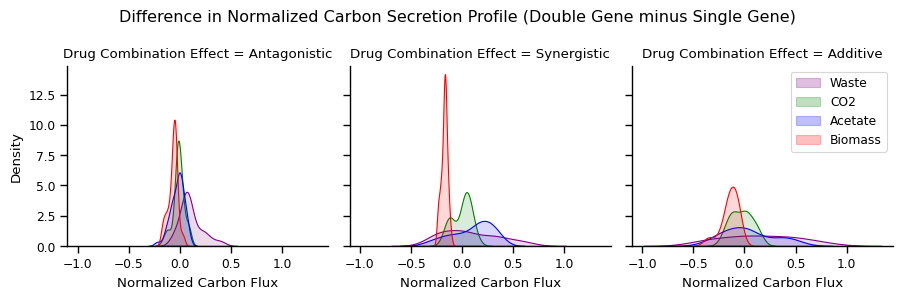

In [67]:
fs_plot = get_fs_kde_plot(fs_change)
plot_kde(fs_plot, col_prefix='percent_')
print('Unique columns: ', fs_plot.query("reaction.str.contains('percent')").reaction.unique())

## Heatmaps

In [68]:
single_pathway_df = pd.read_csv(os.path.join(data_directory, 'single_pathway.csv'), index_col=0)
single_pathway_df['Pathway_list'] = single_pathway_df.Pathway_list.apply(ast.literal_eval)


In [69]:
def get_without_carbon_gcomb(l=None, want_carbon_gcomb=False):
    carbon_pwy = ['Glycolysis/Gluconeogenesis', 'Citric Acid Cycle', 'Alternate Carbon Metabolism', 'Pentose Phosphate Pathway']                         
    carbon_gcomb = list(set(single_pathway_df.explode('Pathway_list').query('Pathway_list in @carbon_pwy & XG=="DG"').index))
    result_l = [ele for ele in l if ele not in carbon_gcomb] if not want_carbon_gcomb else carbon_gcomb
    if 'Normal' not in result_l:
        result_l.append('Normal')
    return result_l

In [70]:
p_cols = ['percent_BIOMASS_Ec_iML1515_core_75p37M', 'percent_EX_bulk_ac_e', 'percent_EX_co2_e', 'percent_Waste']

response_cols = ['Drug_comb_effect_coc', 'Drug_comb_effect_Emono', 'Drug_comb_effect_Smono', 'BM_consortia_frac_binned']
p_cols_w_effect = p_cols + response_cols
fs_sub_change=  (fs_change
                 .set_index('Nth_gene', append=True)
                 .loc[:,p_cols_w_effect]).dropna(axis=0, how='any')
# if 'rm_spec_DG_list' in globals():
#     fs_sub_change = fs_sub_change.query('Gene_inhibition in @rm_spec_DG_list')

Normal_row = pd.DataFrame(0, columns = fs_sub_change.columns, index = ['Normal'])
Normal_row.loc[:,'Drug_comb_effect_coc':'BM_consortia_frac_binned']=None
Normal_row['Nth_gene'] = 'Normal'
Normal_row.index.name='Gene_inhibition'
Normal_row.set_index('Nth_gene', append=True, inplace=True)
Normal_row
fs_sub_change = pd.concat([fs_sub_change, Normal_row])


<Figure size 640x480 with 0 Axes>

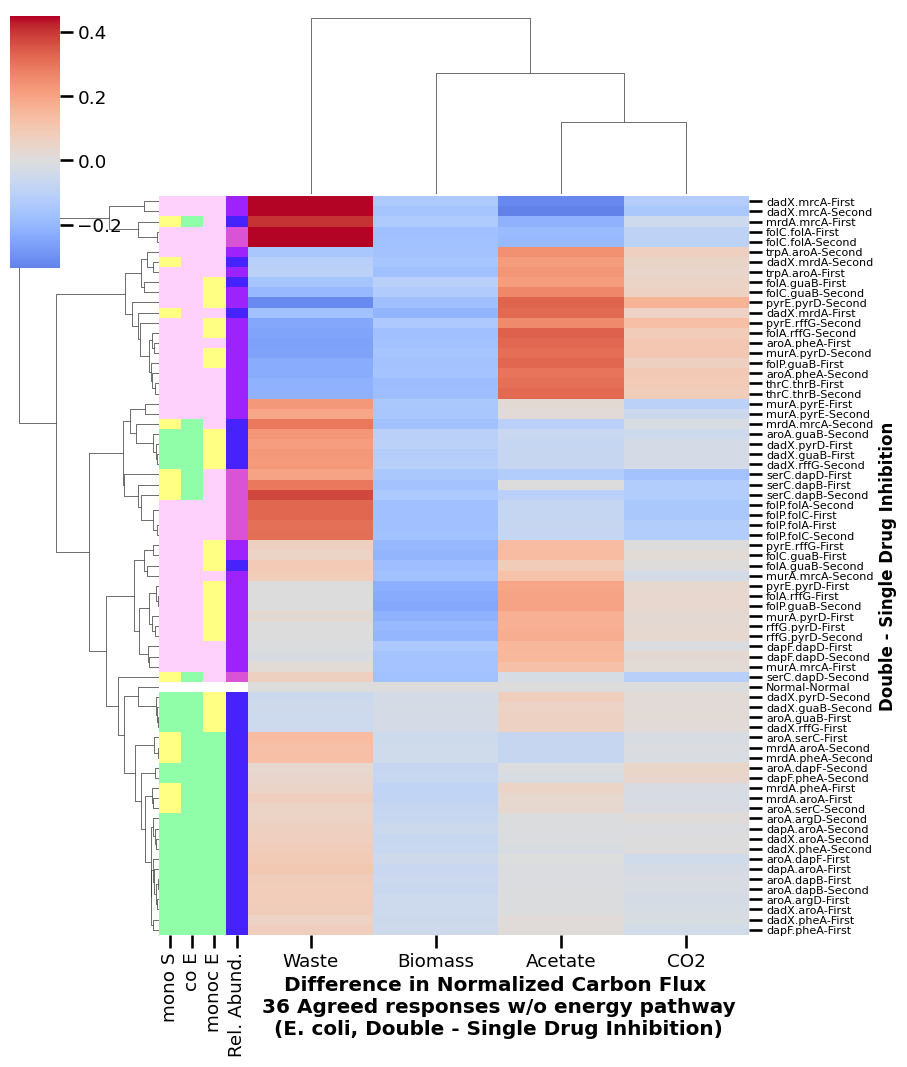

In [71]:
def get_response_agree():
    return ['Normal','mrdA.mrcA', 'serC.dapD', 'serC.dapB', 'mrdA.aroA', 'mrdA.pheA', 'aroA.serC', 'aroA.dapB', 'aroA.guaB', 'dapA.aroA', 'dadX.guaB', 'aroA.argD', 'acnB.gltA', 'dadX.rffG', 'dadX.aroA', 'aroA.dapF', 'dadX.pyrD', 'dadX.pheA', 'acnB.thrB', 'dapF.pheA', 'dapF.acnB', 'dadX.acnB', 'tktA.gnd', 'dadX.mrdA', 'folA.guaB', 'pyrE.rffG', 'rffG.pyrD', 'dadX.mrcA', 'murA.pyrE', 'thrC.thrB', 'pyrE.pyrD', 'aroA.pheA', 'folC.guaB', 'dapF.dapD', 'folA.rffG', 'murA.pyrD', 'murA.mrcA', 'folP.guaB', 'trpA.aroA', 'folP.folA', 'folC.folA', 'dadX.eno', 'dadX.gapA', 'folP.folC']
response_agree = get_response_agree()
response_agree_without_carbon_gcomb = get_without_carbon_gcomb(response_agree)

sns.set_context('talk', font_scale=0.8)

fig = plt.figure()
clustered = sns.clustermap(fs_sub_change.loc[response_agree_without_carbon_gcomb,p_cols] 
            , row_colors=generate_row_colors(fs_sub_change)
            # , standard_scale=1
            , center=0
            # , z_score=1
            , yticklabels=True
            , figsize=(10, 14)
            , vmax=0.45
            , cmap='coolwarm')
relabel_clustermap(clustered, x_label_middle_str=f'{len(response_agree_without_carbon_gcomb)-1} Agreed responses w/o energy pathway')
# exclude count of Normal

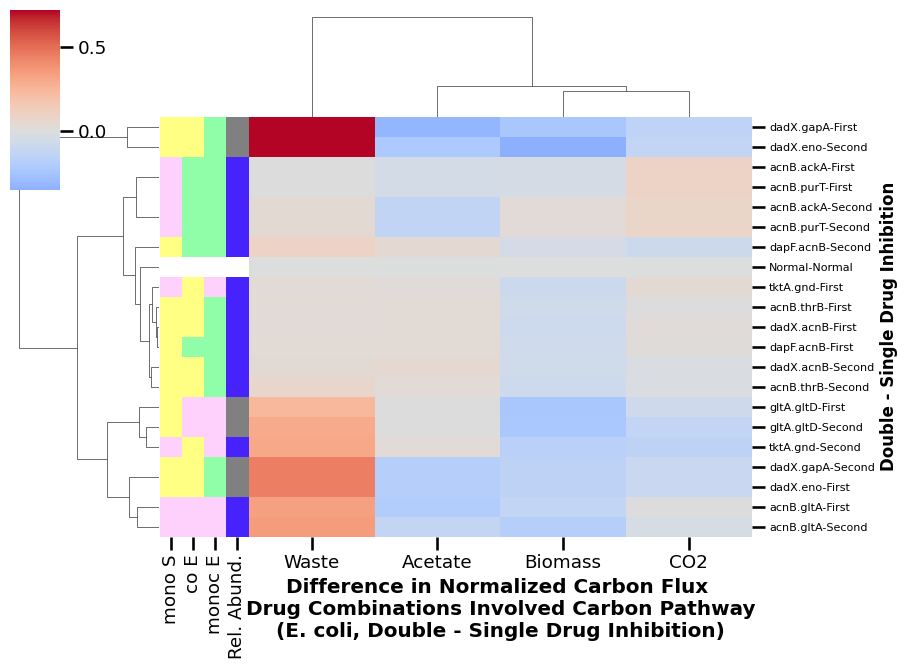

In [41]:
carbon_gcomb = get_without_carbon_gcomb(want_carbon_gcomb=True)
clustered = sns.clustermap(fs_sub_change.loc[carbon_gcomb,p_cols] 
            , row_colors=generate_row_colors(fs_sub_change, color=[ '#4622fc','#9d22fc', '#da52d5', 'grey'])
            # , standard_scale=1
            , center=0
            # , z_score=1
            , yticklabels=True
            , cmap='coolwarm')
relabel_clustermap(clustered, x_label_middle_str='Drug Combinations Involved Carbon Pathway')

In [36]:
def get_disagree_response(additive_threshold=0.05):
    mono_response = pd.concat([convert_po_col(gr_df['po_diff_E0_monoculture']), convert_po_col(gr_df['po_diff_S0_monoculture'])], axis=1)
    response_df = gr_df.filter(regex='po_diff(?!.*rescaled)').apply(lambda x: convert_po_col(x, additive_threshold=additive_threshold), axis=0)
    finer_disagree_Smc = response_df[response_df['po_diff_E0_coculture'] != response_df['po_diff_S0_monoculture']]
    disagreement_response = list(finer_disagree_Smc.index)
    disagreement_response.remove('Normal')
    return disagreement_response
disagreement_response = get_disagree_response()
disagreement_response

['mrdA.mrcA',
 'serC.dapD',
 'serC.dapB',
 'mrdA.aroA',
 'mrdA.pheA',
 'aroA.serC',
 'murA.mrdA',
 'dapF.acnB',
 'acnB.purT',
 'acnB.ackA',
 'tktA.gnd',
 'dadX.mrdA',
 'dapA.dapF',
 'gltA.gltD']

Text(0.5, -416.1666666666666, 'Carbon Fluxes \n(E. coli, Double Drug Inhibition)')

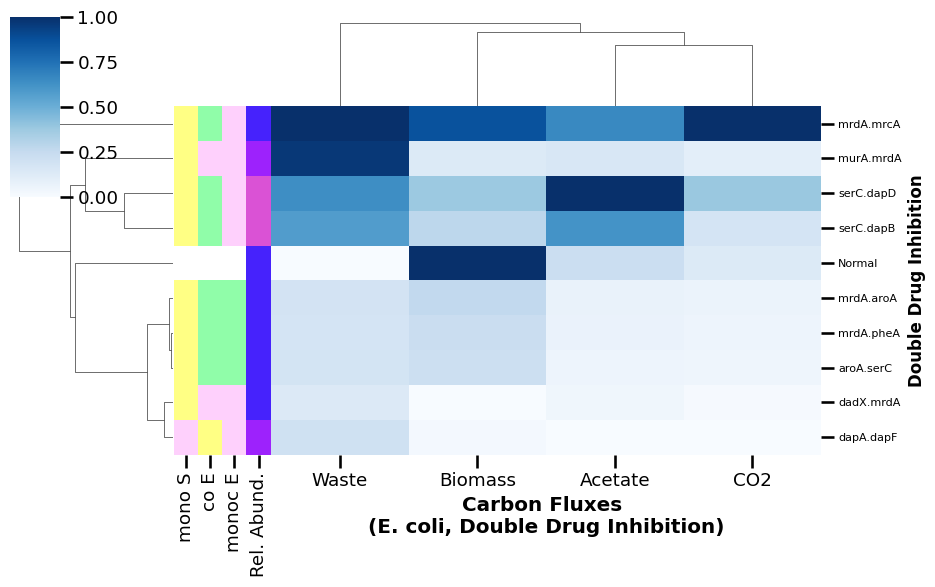

In [44]:
total_carbon_cols = [ele.replace('percent', 'plot_total_carbon') for ele in p_cols]  

sub_disagreement_response_wnormal = disagreement_response.copy()
sub_disagreement_response_wnormal = [ele for ele in sub_disagreement_response_wnormal if ele not in carbon_gcomb]
sub_disagreement_response_wnormal.extend(['Normal'])

plot_cluster_disagree = assign_plot_total_E_wide(carbon_allocation_E_wide,log_waste=False).loc[sub_disagreement_response_wnormal]
row_colors = generate_row_colors(plot_cluster_disagree, color=[ '#4622fc','#9d22fc', '#da52d5', 'grey'])
clustered = sns.clustermap(plot_cluster_disagree[total_carbon_cols] # flux magnitude
            ,row_colors=row_colors
        #    , z_score=1
            , standard_scale=1
            # , center=0
            , cmap='Blues')
relabel_clustermap(clustered, )
clustered.ax_heatmap.set_ylabel('Double Drug Inhibition', weight='bold', fontsize=12)
clustered.ax_heatmap.set_xlabel(f'''Carbon Fluxes \n(E. coli, Double Drug Inhibition)''', weight='bold')
    

In [38]:
gene_columns_used = {'Response_agree_wo_carbon_pathway': response_agree_without_carbon_gcomb, # 
            'carbon_gcomb': carbon_gcomb,
            'Disagreem=ent_response_wo_carbon_pathway': sub_disagreement_response_wnormal}

In [57]:
from collections import defaultdict
gene_columns_used = defaultdict(dict)

gene_columns_used['scatter plot A'] = {'gene_list': 'All',
                'sheet': 'flux',
                'columns':  ['EX_bulk_ac_e', 'BIOMASS_iRR1083_metals']}

gene_columns_used['scatter plot B'] = {'gene_list': 'All',
                            'sheet': 'difference_in_normalized_carbon',
                            'columns':  ['EX_bulk_ac_e', 'EX_co2_e']} 

gene_columns_used['KDE plot C'] = {'gene_list': 'All',
                        'sheet': 'difference_in_normalized_carbon',
                        'columns':  ['percent_BIOMASS_Ec_iML1515_core_75p37M', 'percent_EX_bulk_ac_e',
       'percent_EX_co2_e', 'percent_Waste']}

gene_columns_used[f'{len(response_agree_without_carbon_gcomb)-1} Agreed responses w/o energy pathway'] = {'gene_list': response_agree_without_carbon_gcomb, 
                                                'sheet': 'difference_in_normalized_carbon',
                                                'columns':  p_cols
}

gene_columns_used['Drug Combinations Involved Carbon Pathway'] = {'gene_list': carbon_gcomb,
                            'sheet': 'difference_in_normalized_carbon',
                            'columns':  p_cols}

gene_columns_used['Carbon Fluxes'] = {'gene_list': sub_disagreement_response_wnormal,
                            'sheet': 'normalized_carbon',
                            'columns':  total_carbon_cols}

In [62]:
pd.DataFrame(gene_columns_used).to_csv(os.path.join(data_directory, 'gene_columns_used.csv'))